In [1]:
%matplotlib inline
from __future__ import (absolute_import, division, unicode_literals)
import os
import numpy as np
import pandas as pd
import pyGadget
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set(context='poster', style='white', font='serif', font_scale=1.)
mpl.rc('text', usetex=True)

/home/jhummel/anaconda/envs/upgrading/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Halo Mass Growth History

In [3]:
simname = {'vanilla':r'$u_{\rm \tiny CR} = 0$',
        'cr00': r'$u_{\rm \tiny CR} = u_0$', 
        'cr01': r'$u_{\rm \tiny CR} = 10 u_0$', 
        'cr02': r'$u_{\rm \tiny CR} = 10^2 u_0$', 
        'cr03': r'$u_{\rm \tiny CR} = 10^3 u_0$', 
        'cr04': r'$u_{\rm \tiny CR} = 10^4 u_0$',
        'cr05': r'$u_{\rm \tiny CR} = 10^5 u_0$'}
simlist = ['vanilla', 'cr00','cr01','cr02','cr03','cr04','cr05']
name = ['vanilla', 'cr00', 'cr01', 'cr02', 'cr03', 'cr04', 'cr05']

In [4]:
hstore = pd.HDFStore(os.getenv("HOME")+'/data/stampede/mass_history.hdf5')
sstore = pd.HDFStore(os.getenv("HOME")+'/data/stampede/sinkdata.hdf5')
data= {}
sinkdata = {}
for halo in ['halo1', 'halo2']:
    for sim in simlist: 
        data[halo+'_'+sim] = hstore[halo+'_'+sim]
        sinkdata[halo+'_'+sim] = sstore[halo+'_'+sim]
hstore.close()
sstore.close()

In [5]:
for sim in data.keys():
    df = data[sim]
    print sim, df[df.time > 0].z.iloc[0], len(df.keys())

halo2_vanilla 21.7271225556 18
halo1_vanilla 25.041431903 14
halo1_cr05 29.0993504178 18
halo1_cr04 27.7121746966 18
halo1_cr03 26.3895938662 18
halo1_cr02 25.5261465556 18
halo1_cr01 25.1296313715 18
halo1_cr00 24.9564012262 18
halo2_cr04 26.1394527399 18
halo2_cr05 26.7957523729 18
halo2_cr02 22.8077107982 18
halo2_cr03 24.455510067 18
halo2_cr00 21.7321768752 18
halo2_cr01 21.9331040074 18


In [6]:
total_mass = {}
for i, sim in enumerate(data.keys()):
    mtot = sinkdata[sim][['time','mass']].groupby('time').sum()
    mtot.rename(columns = {'mass':sim}, inplace=True)
    total_mass[sim] = mtot.reset_index()

In [7]:
nkeys = ['10cc', '100cc', '1e4cc', '1e6cc', '1e8cc', '1e9cc', '1e10cc', '1e11cc']
rkeys = ['100pc', '10pc', '1pc', '.1pc', '1e4AU', '5e3AU', '1e3AU']

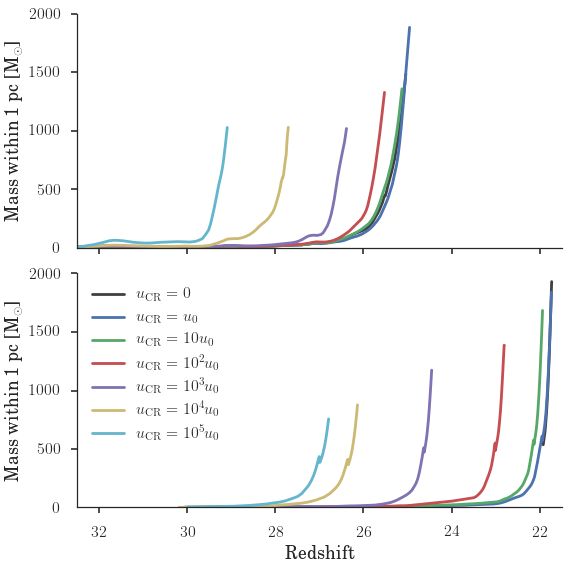

In [8]:
with sns.axes_style('ticks'):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,8), sharex=True, sharey=True)
for ax,halo in zip((ax1,ax2), ('halo1', 'halo2')):
    df = data[halo+'_vanilla']
    df = pd.rolling_mean(df[df['1pc'] > 0], 1)
    ax.plot(df.z, df['1pc'], color='.25', label=simname['vanilla'])
    for sim in simlist[1:]:
        df = data[halo+"_"+sim]
        df = pd.rolling_mean(df[df['1pc'] > 0], 3, center=True)
        ax.plot(df.z, df['1pc'], label=simname[sim])
    ax.set_ylabel('Mass within 1 pc [M$_{\odot}$]')
#ax.set_color_cycle(None)
ax.set_xlim(32.5, 21.5)
ax.set_ylim(1,2e3)
ax.legend(loc=0)
ax.set_xlabel("Redshift")
sns.despine()
fig.tight_layout(w_pad=0.)
fig.savefig('figures/growth/collapse.pdf', bbox_inches='tight')

NameError: name 'mg' is not defined

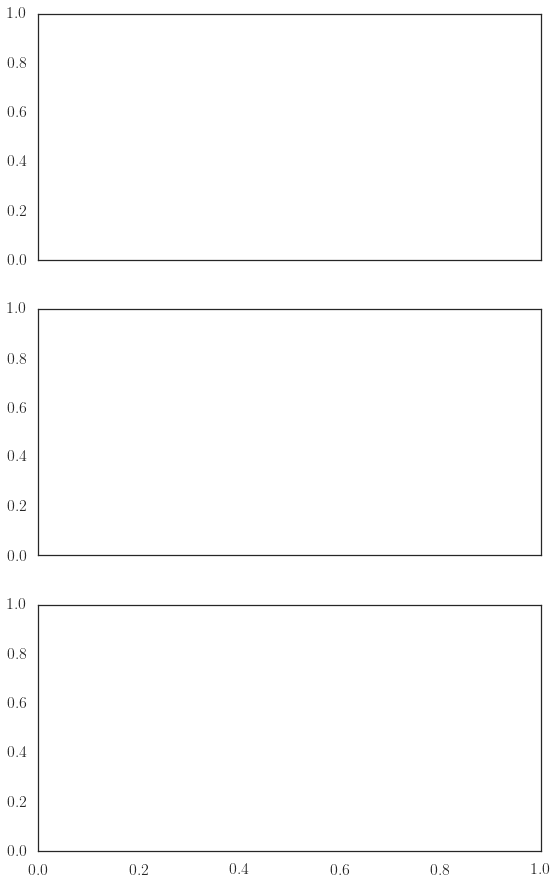

In [9]:
fig, axarr = plt.subplots(3, sharex=True, figsize=(9,15))

for i, dlim in enumerate(['1e4cc', '1e8cc', '1e10cc']):
    axarr[i].axvline(0, lw=1, ls='-', c='.8')
    axarr[i].plot(mg.time, mg[dlim], label=simname['vanilla'], ls='-', color='.25')
    for sim in simlist:
        df = data[sim]
        axarr[i].plot(df.time, df[dlim], label=simname[sim])
    axarr[i].set_ylabel('Mass [M$_{\odot}$]')
    axarr[i].set_xlabel("")
    axarr[i].text(.97,.03,"$n >$ "+dlim.replace('cc', ' cm$^{-3}$') , ha='right', va='bottom', 
                  size=20, transform=axarr[i].transAxes)

axarr[0].set_ylim(500, 1.2e3)
axarr[1].set_ylim(0, 230)
axarr[2].set_ylim(0, 150)
axarr[2].legend(loc=0)
axarr[2].set_xlabel("Time since sink formation [yr]")
plt.xlim(-5e3, 5e3)
fig.subplots_adjust(hspace=0.0)
sns.despine()
fig.savefig('figures/growth/massgrowth_hidens_'+halo+'.png', bbox_inches='tight')

In [ ]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    df = data['vanilla']
    df[df['1e8cc'] > 0].plot(ax=ax, x='time', y='1e8cc', color='.25', label=simname['vanilla'])
    for sim in simlist:
        df = data[sim]
        df[df['1e8cc'] > 0].plot(ax=ax, x='time', y='1e8cc', label=simname[sim])
    ax.set_xlim(-7500,5000)
    ax.set_ylim(0,120)
    ax.legend(loc=0)
    ax.set_ylabel('Mass [M$_{\odot}$]')
    ax.set_xlabel("Time since sink formation [yr]")

In [ ]:
fig, axarr = plt.subplots(3, sharex=True, figsize=(9,15))

for i, dlim in enumerate(nkeys[:3]):
    axarr[i].axvline(0, lw=1, ls='-', c='.8')
    axarr[i] = mg[mg[dlim] > 0].plot(ax=axarr[i], x='z', y=dlim, label=simname['vanilla'],
                                    ls='-', color='.25', grid=False, logy=True)
    for sim in simlist:
        df = data[sim]
        axarr[i] = df[df[dlim] > 0].plot(ax=axarr[i], x='z', y=dlim, label=simname[sim], logy=True)#, grid=False)
    axarr[i].set_ylabel('Mass [M$_{\odot}$]')
    axarr[i].set_xlabel("")
    axarr[i].text(.5,.95,"$n >$ "+dlim.replace('cc', ' cm$^{-3}$') , ha='center', va='top', 
                  size=20, transform=axarr[i].transAxes)

axarr[0].set_ylim(1, 1e4)
axarr[1].set_ylim(.2, 5e3)
axarr[2].set_ylim(.2, 5e3)
axarr[1].legend(loc=0)
axarr[2].set_xlabel("Redshift")
plt.xlim(42, 21)
fig.subplots_adjust(hspace=0.0)
sns.despine()
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

In [ ]:
fig, axarr = plt.subplots(3, sharex=True, figsize=(8,15))

for i, dlim in enumerate(rkeys[:3]):
    axarr[i].axvline(0, lw=1, ls='-', c='.8')
    axarr[i] = mg[mg[dlim] > 0].plot(ax=axarr[i], x='z', y=dlim, label=simname['vanilla'],
                                    ls='-', color='.25', grid=False, logy=False)
    for sim in simlist:
        df = data[sim]
        axarr[i] = df[df[dlim] > 0].plot(ax=axarr[i], x='z', y=dlim, label=simname[sim], logy=False)#, grid=False)
    axarr[i].set_ylabel('Mass [M$_{\odot}$]')
    axarr[i].set_xlabel("")
    axarr[i].text(.5,.95,"$r <$ "+dlim, ha='center', va='top', 
                  size=20, transform=axarr[i].transAxes)

#axarr[0].set_ylim(1, 1e4)
#axarr[1].set_ylim(.2, 5e3)
#axarr[2].set_ylim(.2, 5e3)
axarr[1].legend(loc=0)
axarr[2].set_xlabel("Redshift")
plt.xlim(35, 20)
fig.subplots_adjust(hspace=0.003)
sns.despine()
fig.savefig('figures/growth/massgrowth_lores_'+halo+'.png', bbox_inches='tight')

In [ ]:
fig, axarr = plt.subplots(3, sharex=True, figsize=(9,15))

for i, dlim in enumerate([rkeys[i] for i in [3,4,5]]):
    axarr[i].axvline(0, lw=1, ls='-', c='.8')
    axarr[i] = mg[mg[dlim] > 0].plot(ax=axarr[i], x='time', y=dlim, label=simname['vanilla'],
                                    ls='-', color='.25', grid=False)
    for sim in simlist:
        df = data[sim]
        axarr[i] = df[df[dlim] > 0].plot(ax=axarr[i], x='time', y=dlim, label=simname[sim])#, grid=False)
    axarr[i].set_ylabel('Mass [M$_{\odot}$]')
    axarr[i].set_xlabel("")
    axarr[i].text(.97,.03,"$r <$ "+dlim , ha='right', va='bottom', 
                  size=20, transform=axarr[i].transAxes)

axarr[0].set_ylim(125, 550)
axarr[1].set_ylim(75, 350)
axarr[2].set_ylim(25, 250)
axarr[2].legend(loc=0)
axarr[2].set_xlabel("Time since sink formation [yr]")
plt.xlim(-5e3, 5e3)
fig.subplots_adjust(hspace=0.0)
sns.despine()
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

In [ ]:
eff_label = {'SFE':"Star Formation Efficiency", 'DFE':"Disk Formation Efficiency", 'AcE':"Sink Accretion Efficiency"}

In [ ]:
eff = 'SFE'
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    df = combined['vanilla'].set_index('time')
    ax = df[eff].plot(ax=ax, label=simname['vanilla'], ls='-', color='.25')#, grid=False)
    for sim in simlist:
        df = combined[sim].set_index('time')
        ax = df[eff].plot(ax=ax, label=simname[sim])#, grid=False)
    ax.set_ylabel(eff_label[eff])
    ax.set_xlim(0,5000)
    ax.set_ylim(0,.04)
    ax.legend(loc=2)
#sns.despine()
fig.savefig('figures/growth/efficiency_'+halo+'.png', bbox_inches='tight')

In [ ]:
with sns.axes_style("darkgrid"):
    fig, axl = plt.subplots(1,2, sharex=True, figsize=(15,6))
    eff_label = {'SFE':"Star Formation Efficiency", 'DFE':"Disk Formation Efficiency", 'AcE':"Sink Accretion Efficiency"}
    for i, eff in enumerate(['SFE', 'DFE']):
        df = combined['vanilla'].set_index('time')
        axl[i] = df[eff].plot(ax=axl[i], label=simname['vanilla'], ls='-', color='.25')#, grid=False)
        for sim in simlist:
            df = combined[sim].set_index('time')
            axl[i] = df[eff].plot(ax=axl[i], label=simname[sim])#, grid=False)
        axl[i].set_ylabel(eff_label[eff])
    axl[0].set_xlim(0,5000)
    axl[0].set_ylim(0,.1)
    axl[1].set_ylim(0,0.1)#1.005)
    axl[0].legend(loc=2)
#sns.despine()
fig.savefig('figures/growth/efficiency_'+halo+'.png', bbox_inches='tight')

In [ ]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(12,10))

for ax in fig.axes:
    ax.axvline(0, lw=1.2, ls='-', c='.75')
    
ax0 = mg.plot(ax=ax0, x='time', y='100cc', ls='-', color='.25')
ax1 = mg.plot(ax=ax1, x='time', y='1e8cc', ls='-', color='.25', label=simname['vanilla'])
ax2 = combined['vanilla'].plot(ax=ax2, x='time', y='SFE', ls='-', color='.25')
ax3 = total_mass['vanilla'].plot(ax=ax3, x='time', y=simname['vanilla'], ls='-', color='.25')

#============ Panel A ==============
for sim in simlist:
    df = data[sim]
    ax0 = df.plot(ax=ax0, x='time', y='100cc', label=simname[sim])
ax0.set_ylim(1900,2700)
ax0.set_ylabel('$n >$ 100 cm$^{-3}$ Mass [M$_{\odot}$]')

#============ Panel B ==============
for sim in simlist:
    df = data[sim]
    ax1 = df.plot(ax=ax1, x='time', y='1e8cc', label=simname[sim])
ax1.set_ylim(0,112)
ax1.set_ylabel('$n > 10^8$ cm$^{-3}$ Mass [M$_{\odot}$]')
ax1.legend(loc=0)

#============ Panel C ==============
for sim in simlist:
    df = combined[sim]
    ax2 = df.plot(ax=ax2, x='time', y="SFE", label=simname[sim])
ax2.set_ylim(0,.035)
ax2.set_ylabel('Star Formation Efficiency')

#============ Panel D ==============
for sim in simlist:
    df = total_mass[sim]
    ax3 = df.plot(ax=ax3, x='time', y=simname[sim], label=simname[sim])
ax3.set_ylim(0,70)
ax3.set_ylabel('Total Sink Mass [M$_{\odot}$]')


for ax in fig.axes:
    ax.set_xlim(-1.8e3,5e3)
    ax.set_xticks((-1e3, 0, 1e3, 3e3, 5e3))
    ax.set_xlabel('Time Since Sink Formation [yr]')
#fig.subplots_adjust(vspace=1)
fig.tight_layout()
fig.savefig('figures/growth/sinkgrowth_'+halo+'.png', bbox_inches='tight')